In [1]:
from src.utils.utils import get_algo_by_name, get_env_by_name
from src.utils.save_results import get_task_name, get_metrics_information, get_results_file_name
import numpy as np
import time
import os
from datetime import date
from tqdm import tqdm
from tqdm.notebook import trange, tqdm
today = date.today()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def do_single_experiment(rd, settings):
    env = get_env_by_name(settings)
    env.set()
    agent = get_algo_by_name(settings)
    agent.set_environment(env)
    metrics = agent.iterate_learning()
    return metrics

# Blue Bus Red Bus paradox

In [3]:
nb_rds = 20
max_rounds = 1000
# nb_leaves_per_class = 10
nb_levels = 2

def do_paradox_experiment(nb_childs):

    exp3_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    exp3_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    new_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    new_rewards = np.zeros((nb_rds, int(max_rounds/100)))

    for rd in range(nb_rds):
        settings = {
            'rd': rd,
            'max_rounds': max_rounds,
            'nb_leaves_per_class': nb_childs,
            'nb_levels': nb_levels,
            'env': 'paradox',
            'algo': 'exp3',
        }
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        exp3_regrets[rd] = metrics['regret']
        exp3_rewards[rd] = metrics['reward']
        
        settings['algo'] = 'new'
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        new_regrets[rd] = metrics['regret']
        new_rewards[rd] = metrics['reward']

    # EXP3
    exp3_rgrt_std = np.std(exp3_regrets, axis=0)
    exp3_rwd_std = np.std(exp3_rewards, axis=0)
    exp3_regret = np.mean(exp3_regrets, axis=0)
    exp3_reward = np.mean(exp3_rewards, axis=0)
    
    exp3_result = (exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std)

    # NEW
    new_rgrt_std = np.std(new_regrets, axis=0)
    new_rwd_std = np.std(new_rewards, axis=0)
    new_regret = np.mean(new_regrets, axis=0) 
    new_reward = np.mean(new_rewards, axis=0)
    
    new_result = (new_regret, new_rgrt_std, new_reward, new_rwd_std)
    
    return exp3_result, new_result, list(np.array(exp3_regrets)[:,-1]), list(np.array(new_regrets)[:,-1])

### Perform Experiment

In [4]:
nb_childs = [2, 5, 10, 50]
res_nexp = []
res_exp3 = []
res=[]
labels=[]
exp3_results = []
new_results = []

for nb_child in nb_childs:
    a,b,c,d = do_paradox_experiment(nb_child)
    res_exp3.append(list(c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - N {}'.format(nb_child))
    labels.append('NEW - N {}'.format(nb_child))
    exp3_results.append(a)
    new_results.append(b)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 9357.71it/s]


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 9524.54it/s]


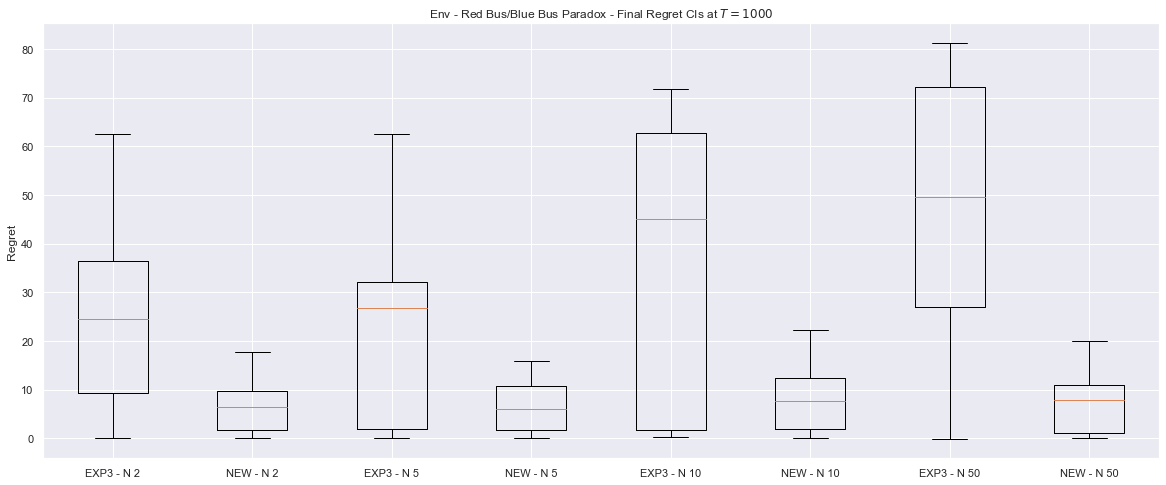

In [5]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Red Bus/Blue Bus Paradox - Final Regret CIs at $T=1000$')

plt.savefig('figure_bbrb_regret_slice.pdf', bbox_inches = "tight")
plt.show()

### Plot results

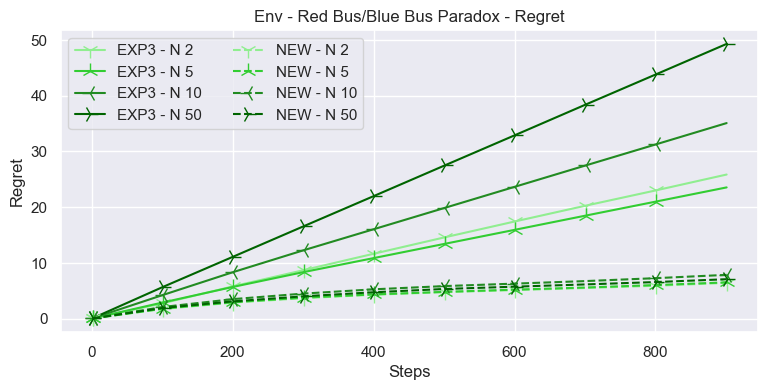

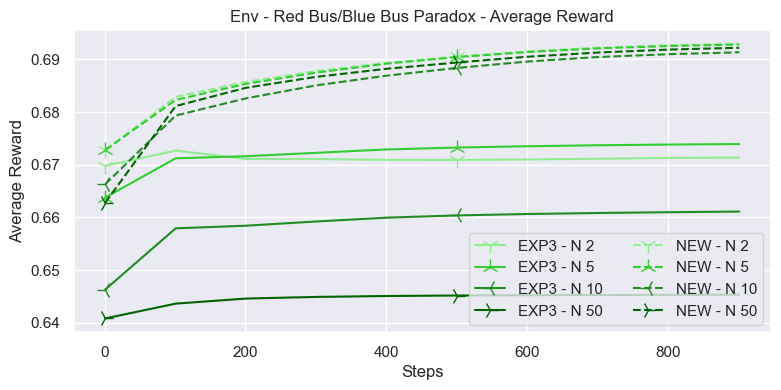

In [6]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['lightsteelblue', 'cornflowerblue', 'royalblue', '#1f77b4']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen']

nb_childs = [2, 5, 10, 50]
markers = ["1", "2", "3", "4"]
# markers = ["*", "+", ".", "v"]


plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_new[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - N {}'.format(nb_childs[idx]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=0.1)
# plt.plot(rounds, .5*rounds**(0.5), label='$t^{0.5}$', linestyle='-.')
    
for idx, new_result in enumerate(new_results):
    # new
    c = colors_new[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - N {}'.format(nb_childs[idx]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=0.1)
# plt.plot(rounds, .05*rounds**(1), label='$t^{1}$', linestyle='-.')
plt.xlabel('Steps')
plt.ylabel('Regret')
plt.title('Env - Red Bus/Blue Bus Paradox - Regret')
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.1, 55)
# plt.xlim(1, 1000)
plt.legend(ncol=2)
plt.savefig('figure_bbrb_regret.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_new[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - N {}'.format(nb_childs[idx]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_new[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - N {}'.format(nb_childs[idx]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=5)
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Red Bus/Blue Bus Paradox - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_bbrb_avg_reward.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

# General Trees

In [7]:
nb_rds = 20
max_rounds = 10000

def do_general_tree_experiment(nb_levels, nb_leaves_per_class):

    exp3_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    exp3_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    new_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    new_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    
    for rd in range(nb_rds):
        settings = {
            'rd': rd,
            'max_rounds': max_rounds,
            'nb_leaves_per_class': nb_leaves_per_class,
            'nb_levels': nb_levels,
            'env': 'general',
            'algo': 'exp3'
        }
        
        print('Running experiment with rnd seed {}, nb levels {}, nb leaves per class {}'.format(rd, nb_levels, nb_leaves_per_class))
        
        
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        exp3_regrets[rd] = metrics['regret']
        exp3_rewards[rd] = metrics['reward']
        
        settings['algo'] = 'new'
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        new_regrets[rd] = metrics['regret']
        new_rewards[rd] = metrics['reward']

    # EXP3
    exp3_rgrt_std = np.std(exp3_regrets, axis=0)
    exp3_rwd_std = np.std(exp3_rewards, axis=0)
    exp3_regret = np.mean(exp3_regrets, axis=0)
    exp3_reward = np.mean(exp3_rewards, axis=0)
    
    exp3_result = (exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std)

    # new
    new_rgrt_std = np.std(new_regrets, axis=0)
    new_rwd_std = np.std(new_rewards, axis=0)
    new_regret = np.mean(new_regrets, axis=0) 
    new_reward = np.mean(new_rewards, axis=0)
    
    new_result = (new_regret, new_rgrt_std, new_reward, new_rwd_std)
    
    return exp3_result, new_result, list(np.array(exp3_regrets)[:,-1]), list(np.array(new_regrets)[:,-1])

In [ ]:
settings = [(2, 50), (2, 100), (2, 200)]
res_nexp = []
res_exp3 = []
res=[]
labels=[]
exp3_results = []
new_results = []

for setting in settings:
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result, c,d = do_general_tree_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)
    res_exp3.append((c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - L {}, M {}'.format(nb_levels, nb_leaves_per_class))
    labels.append('NEW - L {}, M {}'.format(nb_levels, nb_leaves_per_class))

Running experiment with rnd seed 0, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6742.09it/s]


Running experiment with rnd seed 1, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6631.34it/s]


Running experiment with rnd seed 2, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6698.55it/s]


Running experiment with rnd seed 3, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6481.82it/s]


Running experiment with rnd seed 4, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5820.95it/s]


Running experiment with rnd seed 5, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5732.37it/s]


Running experiment with rnd seed 6, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6372.53it/s]


Running experiment with rnd seed 7, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6512.11it/s]


Running experiment with rnd seed 8, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5493.10it/s]


Running experiment with rnd seed 9, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6397.03it/s]


Running experiment with rnd seed 10, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6433.82it/s]


Running experiment with rnd seed 11, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6841.69it/s]


Running experiment with rnd seed 12, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 7033.36it/s]


Running experiment with rnd seed 13, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6812.80it/s]


Running experiment with rnd seed 14, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6704.84it/s]


Running experiment with rnd seed 15, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6443.70it/s]


Running experiment with rnd seed 16, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6300.77it/s]


Running experiment with rnd seed 17, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6823.09it/s]


Running experiment with rnd seed 18, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6856.42it/s]


Running experiment with rnd seed 19, nb levels 2, nb leaves per class 50


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6151.40it/s]


Running experiment with rnd seed 0, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6124.58it/s]


Running experiment with rnd seed 1, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6130.32it/s]


Running experiment with rnd seed 2, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6558.86it/s]


Running experiment with rnd seed 3, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6192.02it/s]


Running experiment with rnd seed 4, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5974.93it/s]


Running experiment with rnd seed 5, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5876.40it/s]


Running experiment with rnd seed 6, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6057.10it/s]


Running experiment with rnd seed 7, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6049.12it/s]


Running experiment with rnd seed 8, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5995.95it/s]


Running experiment with rnd seed 9, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5314.32it/s]


Running experiment with rnd seed 10, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5898.23it/s]


Running experiment with rnd seed 11, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6465.19it/s]


Running experiment with rnd seed 12, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6058.17it/s]


Running experiment with rnd seed 13, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5830.25it/s]


Running experiment with rnd seed 14, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6439.82it/s]


Running experiment with rnd seed 15, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6349.76it/s]


Running experiment with rnd seed 16, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6163.51it/s]


Running experiment with rnd seed 17, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6398.15it/s]


Running experiment with rnd seed 18, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6446.92it/s]


Running experiment with rnd seed 19, nb levels 2, nb leaves per class 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6400.79it/s]


Running experiment with rnd seed 0, nb levels 2, nb leaves per class 200


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5300.74it/s]


Running experiment with rnd seed 1, nb levels 2, nb leaves per class 200


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5590.81it/s]


Running experiment with rnd seed 2, nb levels 2, nb leaves per class 200


In [ ]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Final Regret CIs at $T=10000$')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_breadth_slice.pdf', bbox_inches = "tight")
plt.show()

In [ ]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

colors_exp3 = ['lightsteelblue', 'cornflowerblue', 'royalblue', '#1f77b4', 'blue', 'darkblue']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
# colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

settings = [(2, 50), (2, 100), (2, 200)]
markers = ['-', '--']
markers = ["1", "2", "3", "4"]
# markers = ["*", "+", ".", "v"]

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
# plt.plot(rounds, rounds**(0.5), label='$t^{0.5}$', ls='-.')     
for idx, new_result in enumerate(new_results[:3]):
    # new
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)


# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_breadth.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_general_avg_reward_breadth.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()



In [ ]:
settings = [(4, 3), (5, 3), (6, 3)]
res_nexp = []
res_exp3 = []
res=[]
labels=[]
exp3_results = []
new_results = []


for setting in tqdm(settings):
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result, c, d = do_general_tree_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)
    res_exp3.append((c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - L {}, M {}'.format(nb_levels, nb_leaves_per_class))
    labels.append('NEW - L {}, M {}'.format(nb_levels, nb_leaves_per_class))

In [ ]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Final Regret CIs at $T=10000$')
# plt.xscale('log')
# plt.yscale('log')
# ax1.set_ylim(1, 100)
# ax1.set_xlim(100, 1000)
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth_slice.pdf', bbox_inches = "tight")
plt.show()

In [ ]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

colors_exp3 = ['#1f77b4', 'blue', 'darkblue']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
# colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

settings = [(4, 3), (5, 3), (6, 3)]
markers = ['-', '--']
markers = ["1", "2", "3", "4"]


plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=5)
# plt.plot(rounds, .5*rounds**(0.5), label='$t^{0.5}$', linestyle='-.')    
for idx, new_result in enumerate(new_results[:3]):
    # new
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=5)

# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_general_avg_reward_depth.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

In [93]:
settings = [(1, 5), (1, 10), (1, 50)]
exp3_results = []
new_results = []
res=[]
labels=[]


for setting in tqdm(settings):
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result, c, d = do_general_tree_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)
    res_exp3.append((c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - L {}, M {}'.format(nb_levels, nb_leaves_per_class))
    labels.append('NEW - L {}, M {}'.format(nb_levels, nb_leaves_per_class))

  0%|          | 0/3 [00:00<?, ?it/s]


 11%|█         | 1061/10000 [00:00<00:00, 10607.05it/s]

Running experiment with rnd seed 0, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10962.53it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10139.89it/s][A

  9%|▉         | 927/10000 [00:00<00:00, 9261.68it/s]

Running experiment with rnd seed 1, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10613.20it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9810.12it/s]

 12%|█▏        | 1175/10000 [00:00<00:00, 11746.15it/s]

Running experiment with rnd seed 2, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10989.41it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9897.82it/s][A

 11%|█▏        | 1126/10000 [00:00<00:00, 11240.53it/s]

Running experiment with rnd seed 3, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10369.87it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10341.99it/s][A

 12%|█▏        | 1247/10000 [00:00<00:00, 12462.79it/s]

Running experiment with rnd seed 4, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10140.37it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10559.51it/s][A

 13%|█▎        | 1288/10000 [00:00<00:00, 12878.45it/s]

Running experiment with rnd seed 5, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11030.06it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10822.50it/s][A

 12%|█▏        | 1192/10000 [00:00<00:00, 11914.76it/s]

Running experiment with rnd seed 6, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10507.40it/s]A

100%|██████████| 10000/10000 [00:01<00:00, 9722.92it/s][A

 11%|█         | 1117/10000 [00:00<00:00, 11165.19it/s]

Running experiment with rnd seed 7, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11117.44it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10280.43it/s]A

 11%|█         | 1101/10000 [00:00<00:00, 10949.99it/s]

Running experiment with rnd seed 8, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:01<00:00, 9217.06it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 8513.25it/s][A

 11%|█         | 1101/10000 [00:00<00:00, 11005.58it/s]

Running experiment with rnd seed 9, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11043.13it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10796.85it/s][A

 13%|█▎        | 1275/10000 [00:00<00:00, 12744.00it/s]

Running experiment with rnd seed 10, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10672.96it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9845.92it/s][A

  7%|▋         | 723/10000 [00:00<00:01, 7223.93it/s]

Running experiment with rnd seed 11, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:01<00:00, 8384.56it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 8908.36it/s][A

 13%|█▎        | 1259/10000 [00:00<00:00, 12587.49it/s]

Running experiment with rnd seed 12, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10130.82it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11796.53it/s][A

 13%|█▎        | 1328/10000 [00:00<00:00, 13273.37it/s]

Running experiment with rnd seed 13, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11303.15it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10717.48it/s][A

  8%|▊         | 801/10000 [00:00<00:01, 7978.39it/s]

Running experiment with rnd seed 14, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10042.57it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9370.61it/s][A

 11%|█         | 1057/10000 [00:00<00:00, 10564.22it/s]

Running experiment with rnd seed 15, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11098.56it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9762.35it/s][A

  9%|▉         | 880/10000 [00:00<00:01, 8793.91it/s]

Running experiment with rnd seed 16, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:01<00:00, 9561.03it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9743.56it/s][A

 10%|█         | 1001/10000 [00:00<00:00, 9560.18it/s]

Running experiment with rnd seed 17, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 10669.31it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10446.86it/s][A

 10%|▉         | 987/10000 [00:00<00:00, 9867.94it/s]

Running experiment with rnd seed 18, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11144.73it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11301.25it/s][A

 11%|█         | 1109/10000 [00:00<00:00, 11085.54it/s]

Running experiment with rnd seed 19, nb levels 1, nb leaves per class 5



100%|██████████| 10000/10000 [00:00<00:00, 11505.65it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10567.86it/s][A

 12%|█▏        | 1202/10000 [00:00<00:00, 12017.09it/s]

Running experiment with rnd seed 0, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11390.61it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11200.53it/s][A

 12%|█▏        | 1160/10000 [00:00<00:00, 11596.97it/s]

Running experiment with rnd seed 1, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11988.75it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11354.18it/s][A

 13%|█▎        | 1301/10000 [00:00<00:00, 12960.88it/s]

Running experiment with rnd seed 2, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 10660.54it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9516.61it/s][A

 12%|█▏        | 1201/10000 [00:00<00:00, 10530.50it/s]

Running experiment with rnd seed 3, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:01<00:00, 9866.85it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10020.42it/s]A

 11%|█         | 1076/10000 [00:00<00:00, 10753.04it/s]

Running experiment with rnd seed 4, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 10970.05it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10846.08it/s][A

 13%|█▎        | 1297/10000 [00:00<00:00, 12964.54it/s]

Running experiment with rnd seed 5, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11023.78it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10661.54it/s][A

 11%|█         | 1093/10000 [00:00<00:00, 10928.13it/s]

Running experiment with rnd seed 6, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11396.91it/s]

100%|██████████| 10000/10000 [00:00<00:00, 10900.88it/s][A

  8%|▊         | 813/10000 [00:00<00:01, 8129.62it/s]

Running experiment with rnd seed 7, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11352.65it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11464.10it/s][A

 14%|█▎        | 1360/10000 [00:00<00:00, 13597.81it/s]

Running experiment with rnd seed 8, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11993.87it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10793.97it/s][A

 12%|█▏        | 1246/10000 [00:00<00:00, 12449.33it/s]

Running experiment with rnd seed 9, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11980.68it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10951.98it/s][A

 11%|█▏        | 1144/10000 [00:00<00:00, 11435.43it/s]

Running experiment with rnd seed 10, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 10969.51it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11097.52it/s][A

 10%|█         | 1047/10000 [00:00<00:00, 10468.54it/s]

Running experiment with rnd seed 11, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11294.06it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11551.02it/s][A

 12%|█▏        | 1170/10000 [00:00<00:00, 11698.95it/s]

Running experiment with rnd seed 12, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 10982.66it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10908.92it/s][A

 14%|█▍        | 1392/10000 [00:00<00:00, 13913.15it/s]

Running experiment with rnd seed 13, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11290.94it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10796.97it/s][A

 14%|█▍        | 1407/10000 [00:00<00:00, 14064.95it/s]

Running experiment with rnd seed 14, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 12310.99it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11454.64it/s][A

 13%|█▎        | 1294/10000 [00:00<00:00, 12937.14it/s]

Running experiment with rnd seed 15, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11617.81it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11155.87it/s][A

 13%|█▎        | 1310/10000 [00:00<00:00, 13098.92it/s]

Running experiment with rnd seed 16, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11930.17it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11237.23it/s][A

 13%|█▎        | 1298/10000 [00:00<00:00, 12977.01it/s]

Running experiment with rnd seed 17, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 11265.75it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10492.46it/s][A

 12%|█▏        | 1190/10000 [00:00<00:00, 11898.93it/s]

Running experiment with rnd seed 18, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 10585.26it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11095.33it/s][A

 10%|█         | 1022/10000 [00:00<00:00, 10217.33it/s]

Running experiment with rnd seed 19, nb levels 1, nb leaves per class 10



100%|██████████| 10000/10000 [00:00<00:00, 10996.22it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10973.63it/s][A

 11%|█         | 1124/10000 [00:00<00:00, 11237.97it/s]

Running experiment with rnd seed 0, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:01<00:00, 9070.51it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9373.04it/s][A

 13%|█▎        | 1268/10000 [00:00<00:00, 12678.23it/s]

Running experiment with rnd seed 1, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11536.03it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10303.67it/s][A

 13%|█▎        | 1330/10000 [00:00<00:00, 13293.04it/s]

Running experiment with rnd seed 2, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11717.09it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10408.71it/s]A

 13%|█▎        | 1264/10000 [00:00<00:00, 12634.44it/s]

Running experiment with rnd seed 3, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11379.69it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10708.04it/s][A

 10%|█         | 1040/10000 [00:00<00:00, 10399.24it/s]

Running experiment with rnd seed 4, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11145.54it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 11117.95it/s][A

  9%|▉         | 914/10000 [00:00<00:00, 9133.52it/s]

Running experiment with rnd seed 5, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11397.27it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10977.74it/s][A

 13%|█▎        | 1270/10000 [00:00<00:00, 12698.07it/s]

Running experiment with rnd seed 6, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11239.92it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10767.16it/s][A

 14%|█▎        | 1358/10000 [00:00<00:00, 13574.74it/s]

Running experiment with rnd seed 7, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11623.79it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10951.99it/s][A

 13%|█▎        | 1280/10000 [00:00<00:00, 12798.00it/s]

Running experiment with rnd seed 8, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11634.59it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9876.90it/s][A

 10%|█         | 1034/10000 [00:00<00:00, 10335.03it/s]

Running experiment with rnd seed 9, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 10621.41it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9048.16it/s][A

 12%|█▏        | 1171/10000 [00:00<00:00, 11702.17it/s]

Running experiment with rnd seed 10, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:01<00:00, 9909.65it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9866.10it/s]

 12%|█▏        | 1194/10000 [00:00<00:00, 11932.02it/s]

Running experiment with rnd seed 11, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 10808.59it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10143.57it/s][A

 10%|█         | 1022/10000 [00:00<00:00, 10216.82it/s]

Running experiment with rnd seed 12, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:01<00:00, 9925.97it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9199.52it/s][A

 11%|█         | 1053/10000 [00:00<00:00, 10529.46it/s]

Running experiment with rnd seed 13, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:01<00:00, 9747.01it/s]

100%|██████████| 10000/10000 [00:01<00:00, 9498.44it/s][A

 13%|█▎        | 1266/10000 [00:00<00:00, 12654.28it/s]

Running experiment with rnd seed 14, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11420.82it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9847.26it/s][A

  9%|▉         | 940/10000 [00:00<00:00, 9397.93it/s]

Running experiment with rnd seed 15, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:01<00:00, 9754.83it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10447.37it/s][A

 10%|█         | 1001/10000 [00:00<00:00, 9706.68it/s]

Running experiment with rnd seed 16, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:01<00:00, 9423.53it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 8556.84it/s][A

 11%|█         | 1094/10000 [00:00<00:00, 10936.80it/s]

Running experiment with rnd seed 17, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 11279.10it/s][A

100%|██████████| 10000/10000 [00:01<00:00, 9887.81it/s][A

 10%|▉         | 978/10000 [00:00<00:00, 9779.52it/s]

Running experiment with rnd seed 18, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 10916.45it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10201.66it/s][A

 12%|█▏        | 1210/10000 [00:00<00:00, 12097.59it/s]

Running experiment with rnd seed 19, nb levels 1, nb leaves per class 50



100%|██████████| 10000/10000 [00:00<00:00, 10903.22it/s][A

100%|██████████| 10000/10000 [00:00<00:00, 10533.73it/s][A


No handles with labels found to put in legend.


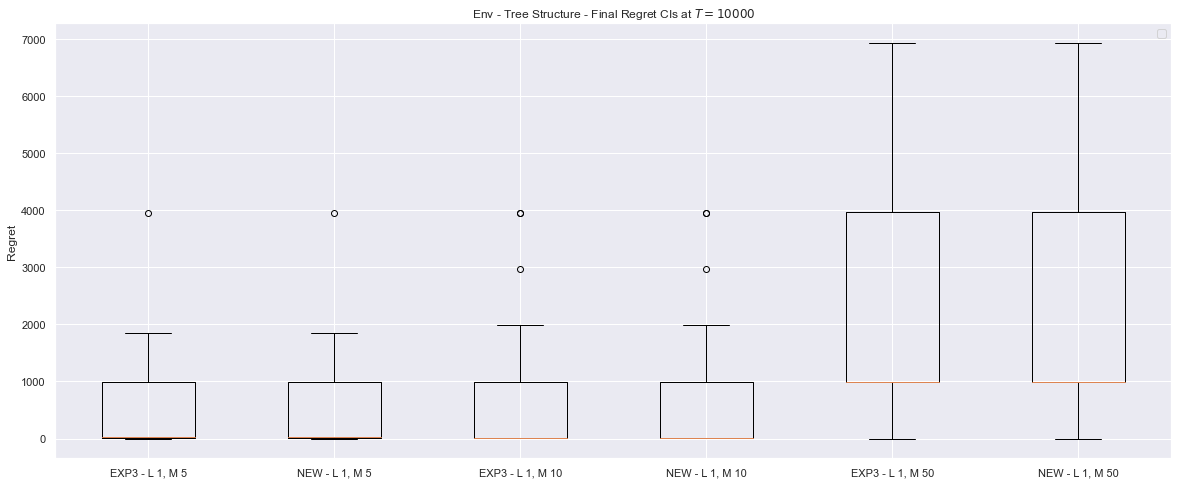

In [94]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Final Regret CIs at $T=10000$')
# plt.xscale('log')
# plt.yscale('log')
# ax1.set_ylim(1, 100)
# ax1.set_xlim(100, 1000)
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth_slice2.pdf', bbox_inches = "tight")
plt.show()

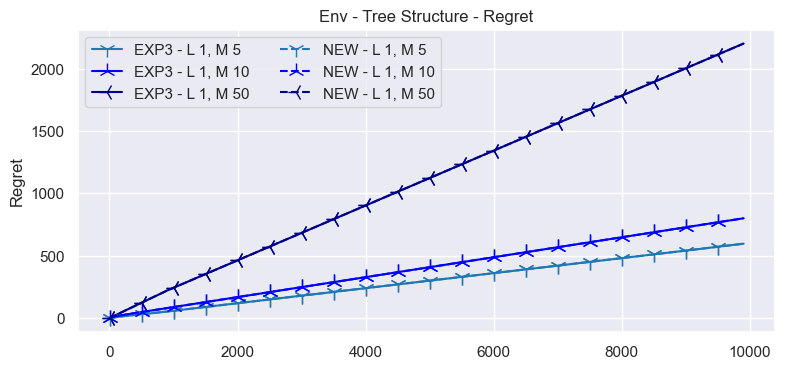

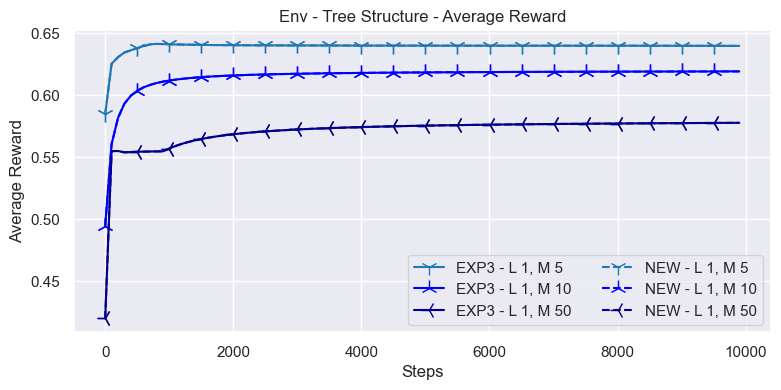

In [99]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

colors_exp3 = ['#1f77b4', 'blue', 'darkblue']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
# colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

# settings = [(5, 3), (6, 3), (7, 3)]
markers = ['-', '--']
markers = ["1", "2", "3", "4"]


plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=5)
# plt.plot(rounds, .5*rounds**(0.5), label='$t^{0.5}$', linestyle='-.')    
for idx, new_result in enumerate(new_results[:3]):
    # new
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=5)

# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth2.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_general_avg_reward_depth2.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

In [18]:
def do_shallow_experiment(nb_levels, nb_leaves_per_class, max_rounds=10000, nb_rds=5):

    exp3_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    exp3_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    new_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    new_rewards = np.zeros((nb_rds, int(max_rounds/100)))

    for rd in range(nb_rds):
        settings = {
            'rd': rd,
            'max_rounds': max_rounds,
            'nb_leaves_per_class': nb_leaves_per_class,
            'nb_levels': nb_levels,
            'env': 'general',
            'algo': 'exp3',
        }
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        exp3_regrets[rd] = metrics['regret']
        exp3_rewards[rd] = metrics['reward']
        
        settings['algo'] = 'new'
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        new_regrets[rd] = metrics['regret']
        new_rewards[rd] = metrics['reward']

    # EXP3
    exp3_rgrt_std = np.std(exp3_regrets, axis=0)
    exp3_rwd_std = np.std(exp3_rewards, axis=0)
    exp3_regret = np.mean(exp3_regrets, axis=0)
    exp3_reward = np.mean(exp3_rewards, axis=0)
    
    exp3_result = (exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std)

    # new
    new_rgrt_std = np.std(new_regrets, axis=0)
    new_rwd_std = np.std(new_rewards, axis=0)
    new_regret = np.mean(new_regrets, axis=0) 
    new_reward = np.mean(new_rewards, axis=0)
    
    new_result = (new_regret, new_rgrt_std, new_reward, new_rwd_std)
    
    return exp3_result, new_result

In [19]:
settings = [(1, 5), (1, 10), (1, 50)]
exp3_results = []
new_results = []

for setting in settings:
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result = do_shallow_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)

100%|██████████| 10000/10000 [00:01<00:00, 9540.18it/s]


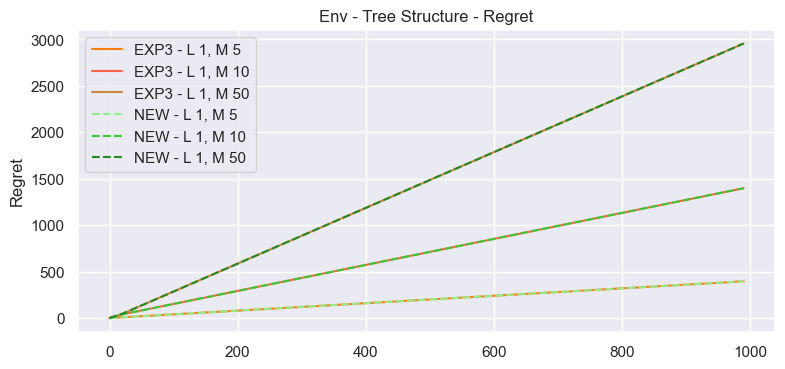

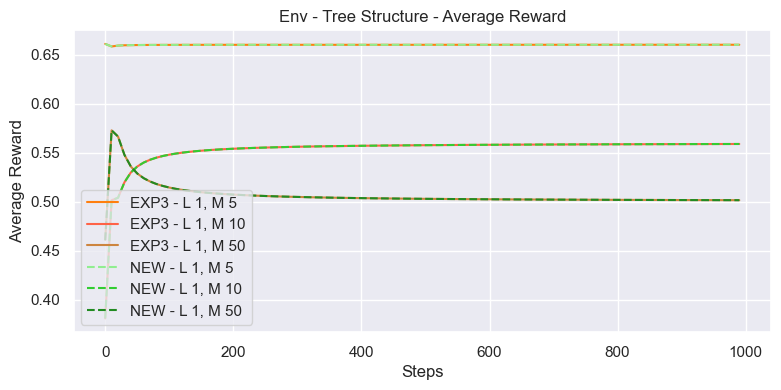

In [22]:
rounds = np.arange(0, max_rounds, 10)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

# colors_exp3 = ['#1f77b4', 'blue', 'darkblue']
colors_exp3 = ['#ff7f0e', 'tomato', 'peru', 'gold']
colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

settings = [(1, 5), (1, 10), (1, 50)]
markers = ['-', '--']

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-')
    
for idx, new_result in enumerate(new_results):
    # new
    c = colors_new[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--')


plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend()
plt.savefig('figure_general_regret_check.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-')
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_new[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--')
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend()
plt.savefig('figure_general_avg_reward_check.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

In [23]:
exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
max_rounds = 10000

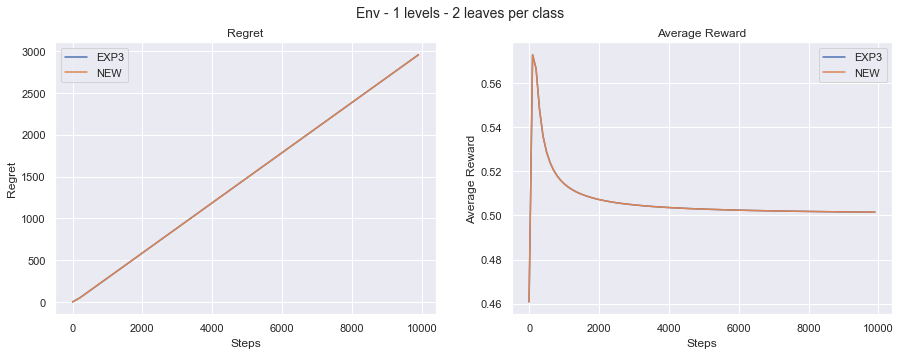

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
nb_levels=1; nb_leaves_per_class=2
rounds = np.arange(0, max_rounds, 100)

ax1.plot(rounds, exp3_regret, label='EXP3')
ax1.plot(rounds, new_regret, label='NEW')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Regret')
ax1.set_title('Regret')
ax1.legend()
ax2.plot(rounds, exp3_reward, label='EXP3')
ax2.plot(rounds, new_reward, label='NEW')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Average Reward')
ax2.set_title('Average Reward')
ax2.legend()
fig.suptitle("Env - {} levels - {} leaves per class".format(nb_levels, nb_leaves_per_class), fontsize=14)
plt.show()

### Visualisation tools

In [27]:
rd = 42
max_rounds = 10000
nb_leaves_per_class = 3
nb_levels = 4

settings = {
    'rd': rd,
    'max_rounds': max_rounds,
    'nb_leaves_per_class': nb_leaves_per_class,
    'nb_levels': nb_levels,
    'env': 'general',
    'algo': 'new',
}

env = get_env_by_name(settings)
env.set()
agent = get_algo_by_name(settings)
agent.set_environment(env)
metrics = agent.iterate_learning()

100%|██████████| 10000/10000 [00:02<00:00, 4127.57it/s]


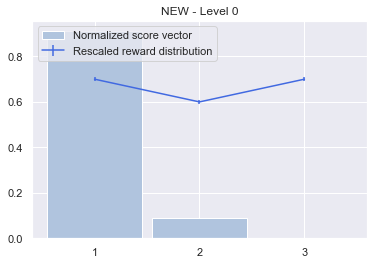

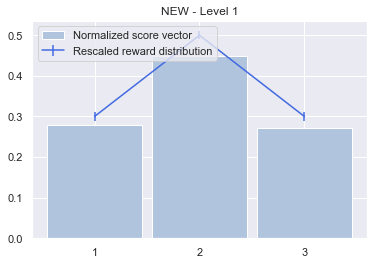

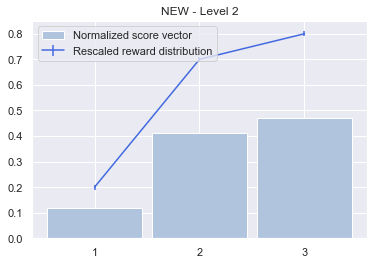

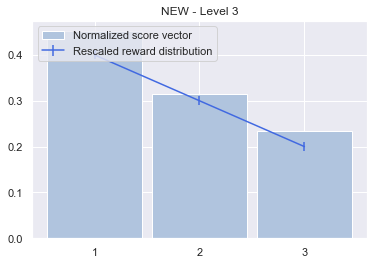

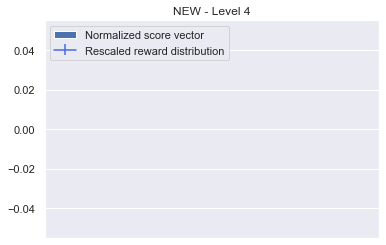

In [28]:
def visualize_scores_through_path(env, path=None):
    
    if not path:
        path = env.best_strategy_nodes_path
    def visualize_by_node(node, idx):

        scores = node.scores_children
        scores = scores/np.sum(scores)
        level_correction =  10**(-node.level)
        means = [node.value/level_correction for node in node.children]
        scales = 0.1 * 0.1
        x_idxes = np.arange(1, node.scores_children.shape[0]+1)
        plt.figure()
        plt.bar(x_idxes, scores, width=0.9, color='lightsteelblue', label='Normalized score vector')
        plt.errorbar(x_idxes, means, yerr=scales, label='Rescaled reward distribution', color='royalblue')
        plt.xticks(x_idxes)
        plt.legend(loc="upper left")
        plt.title("NEW - Level {}".format(node.level))
        plt.savefig('visualisation_new_level_{}.pdf'.format(node.level), bbox_inches = "tight")

    for idx, node in enumerate(path):
        visualize_by_node(node, idx)
        
visualize_scores_through_path(env)

  0%|          | 0/10000 [00:00<?, ?it/s]

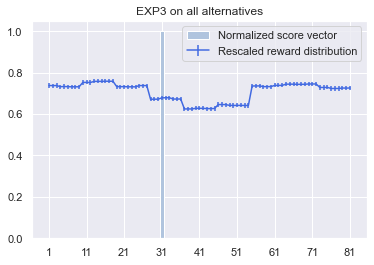

In [35]:


settings['algo'] = 'exp3' 

env = get_env_by_name(settings)
env.set()
agent = get_algo_by_name(settings)
agent.set_environment(env)

def visualize(scores):

    scores = score_vector/np.sum(score_vector)

    path_action_sets = [env.tree.get_parent_nodes(action_node) for action_node in agent.action_set]

    means = np.zeros_like(scores)

    for idx, path in enumerate(path_action_sets):
        means[idx] = np.sum([node.value for node in path])


    scales = 0.1 * 0.1
    x_idxes = np.arange(1, scores.shape[0]+1)
    plt.figure()
    plt.bar(x_idxes, scores, width=0.9, color='lightsteelblue', label='Normalized score vector')
    plt.errorbar(x_idxes, means, yerr=scales, label='Rescaled reward distribution', color='royalblue')
    x_ticks = np.arange(1, scores.shape[0]+1, 10)
    plt.xticks(x_ticks)
    plt.legend(loc="upper right")
    plt.title("EXP3 on all alternatives")
    plt.savefig('visualisation_exp3.pdf', bbox_inches = "tight")
    
self = agent
initial_dist = np.full(self.number_of_actions, 1.0 / self.number_of_actions)
score_vector = initial_dist

metrics = {
    'reward': [],
    'regret': [],
    'round': []
}
regrets = []
rewards = []
store_score = []
action_sampled = []


for round_ in tqdm(range(0, self.max_round)):

    # Choose action
    lr = 1/np.sqrt(round_+1)
    action, proba = self.sample_action(score_vector*lr)
    action_sampled.append(action)

    # Receive rewards from environment
    reward = self.environment.get_reward_by_path(self.paths_action_set[action])
    best_strategy_reward = self.environment.get_best_strategy_reward()
    regrets.append(best_strategy_reward - reward)
    rewards.append(reward)

    # Update scores
    score_vector = self.update_score(score_vector, proba, action, reward)
#     print(action, score_vector)
    store_score.append(score_vector)

    if round_ % 100 == 0:
        metrics['reward'].append(np.mean(rewards))
        regret = np.sum(regrets)
        metrics['regret'].append(regret)
        metrics['round'].append(round)

# Visualisation
# self.score_vector = score
        
visualize(score_vector)

